In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.2.1

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 111.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import joblib
from pydantic import BaseModel, Field
from pydantic.tools import parse_obj_as
import matplotlib.pyplot as plt 
from tqdm import tqdm
import numpy as np

!curl -L -o student_data.csv "https://seansun.org/17313/P4/ML/student_data.csv"
!curl -L -o model.pkl "https://seansun.org/17313/P4/ML/model.pkl"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26963  100 26963    0     0   537k      0 --:--:-- --:--:-- --:--:--  537k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.3M  100 14.3M    0     0   112M      0 --:--:-- --:--:-- --:--:--  112M


In [ ]:
# Pydantic Models
class Student(BaseModel):
    student_id: str = Field(alias="Student ID")
    gender: str = Field(alias="Gender")
    age: str = Field(alias="Age")
    major: str = Field(alias="Major")
    gpa: str = Field(alias="GPA")
    extra_curricular: str = Field(alias="Extra Curricular")
    num_programming_languages: str = Field(alias="Num Programming Languages")
    num_past_internships: str = Field(alias="Num Past Internships")

    class Config:
        allow_population_by_field_name = True

In [ ]:
class PredictionResult(BaseModel):
    good_employee: int

In [ ]:
# Main Functionality
def predict(student):
    '''
    Returns a prediction on whether the student will be a good employee
    based on given parameters by using the ML model

    Parameters
    ----------
    student : dict
        A dictionary that contains all fields in Student
    
    Returns
    -------
    dict
        A dictionary satisfying type PredictionResult, contains a single field
        'good_employee' which is either 1 (will be a good employee) or 0 (will
        not be a good employee)
    '''
    # Use Pydantic to validate model fields exist
    student = parse_obj_as(Student, student)

    clf = joblib.load('./model.pkl')
    
    student = student.dict(by_alias=True)
    query = pd.DataFrame(student, index=[0])
    prediction = clf.predict(query) # TODO: Error handling ??

    return { 'good_employee': prediction[0] }

In [ ]:
df = pd.read_csv("./student_data.csv")

In [ ]:
dfdict = df.to_dict(orient='records')
for student in tqdm(dfdict):
    student["result"] = predict(student)['good_employee']

100%|██████████| 500/500 [02:21<00:00,  3.52it/s]


In [ ]:
acc = 0
acc_count = 0
C = np.zeros((2, 2))
for student in dfdict:
    if student['Good Candidate'] == student['result']:
        acc += 1
    C[student['Good Candidate']][student['result']] += 1
    acc_count += 1
print("Accuracy: ", acc/acc_count)
print("Confusion matrix:")
print(C)

Accuracy:  0.832
Confusion matrix:
[[221.  42.]
 [ 42. 195.]]


<Axes: >

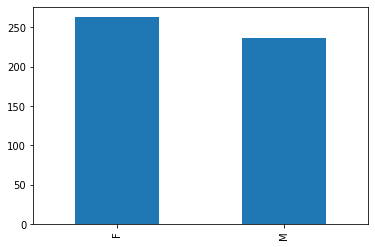

In [ ]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

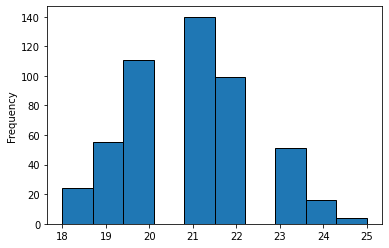

In [ ]:
df['Age'].plot(kind='hist', edgecolor='black')

<Axes: >

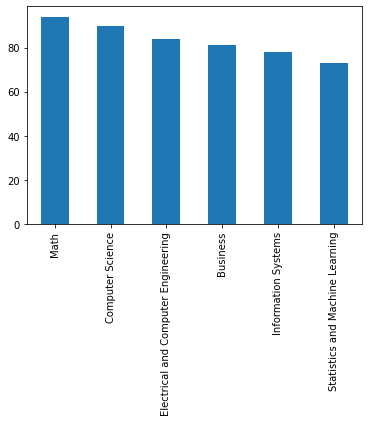

In [ ]:
df['Major'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

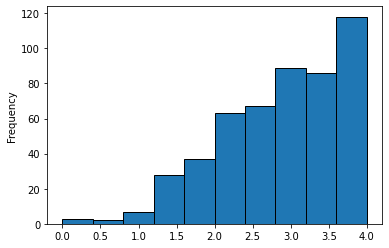

In [ ]:
df['GPA'].plot(kind='hist', edgecolor='black')

<Axes: >

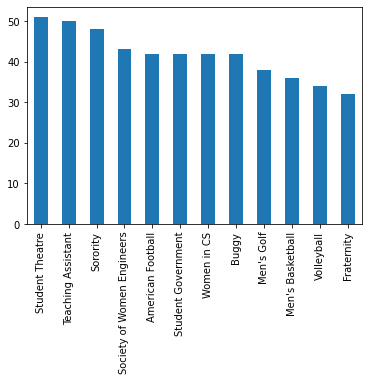

In [ ]:
df['Extra Curricular'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

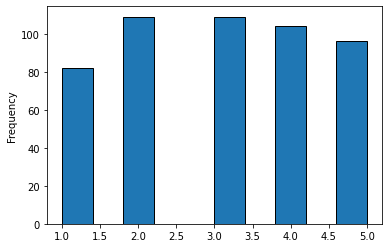

In [ ]:
df['Num Programming Languages'].plot(kind='hist', edgecolor='black')

<Axes: ylabel='Frequency'>

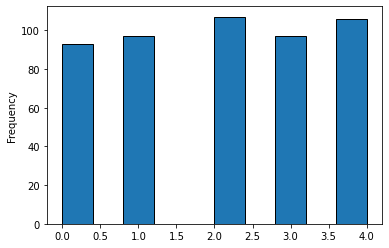

In [ ]:
df['Num Past Internships'].plot(kind='hist', edgecolor='black')